In [489]:
import pandas as pd
import numpy as np
import koreanize_matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from lightgbm import LGBMRegressor

# 회귀 : Delivery ETA 수업용

## 1) 데이터 확인 및 전처리

In [490]:

orig_test_df = pd.read_csv("./data/real_world_data/delivery_eta_test.csv")
orig_train_df = pd.read_csv("./data/real_world_data/delivery_eta_train.csv")

df = orig_train_df.copy()
df.head()

,Order_ID,Distance_km,Prep_Time_min,Riders_Available,Order_Queue,Weather,Rain_mm,Temp_C,Wind_mps,Rush_Hour,DayOfWeek,Time_Slot,Vehicle,Road_Type,Promo,Tip_Level,Delivery_Time_min
0,11502,6.1,15,9,3,Clear,0.0,14.9,1.2,1,1,Dinner,Scooter,Suburban,0,2,59.7
1,12587,7.5,14,15,6,Clear,0.0,14.3,3.0,0,0,Lunch,Scooter,Downtown,1,3,62.9
2,12654,17.6,24,14,4,Rain,4.8,27.0,3.2,0,0,Dinner,Bike,Downtown,0,2,134.7
3,11056,6.8,15,11,5,Clear,0.0,9.2,5.4,0,3,Night,Scooter,Highway,0,0,60.1
4,10706,19.6,16,11,2,Clear,0.0,11.8,2.6,1,2,Dinner,Bike,Downtown,0,1,149.2


In [491]:
cols_to_std = ["Distance_km", "Prep_Time_min", "Order_Queue", "Rain_mm", "Temp_C", "Wind_mps"]
cols_to_reg = ["Riders_Available", "DayOfWeek", "Tip_Level"]
cols_to_onehot = ["Weather", "Time_Slot", "Vehicle", "Road_Type"]

In [492]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Order_ID           4000 non-null   int64  
 1   Distance_km        4000 non-null   float64
 2   Prep_Time_min      4000 non-null   int64  
 3   Riders_Available   4000 non-null   int64  
 4   Order_Queue        4000 non-null   int64  
 5   Weather            4000 non-null   str    
 6   Rain_mm            4000 non-null   float64
 7   Temp_C             4000 non-null   float64
 8   Wind_mps           4000 non-null   float64
 9   Rush_Hour          4000 non-null   int64  
 10  DayOfWeek          4000 non-null   int64  
 11  Time_Slot          4000 non-null   str    
 12  Vehicle            4000 non-null   str    
 13  Road_Type          4000 non-null   str    
 14  Promo              4000 non-null   int64  
 15  Tip_Level          4000 non-null   int64  
 16  Delivery_Time_min  4000 non-null   

In [493]:
df["Distance_km"]

0        6.1
1        7.5
2       17.6
3        6.8
4       19.6
        ... 
3995     2.5
3996     3.3
3997     3.6
3998     1.6
3999     1.7
Name: Distance_km, Length: 4000, dtype: float64

<Axes: ylabel='Frequency'>

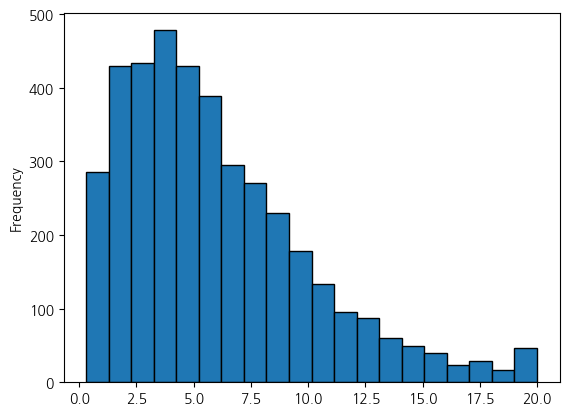

In [494]:
df["Distance_km"].plot(kind="hist", bins=20, edgecolor="black")

In [495]:
df["Prep_Time_min"]

0       15
1       14
2       24
3       15
4       16
        ..
3995    14
3996    13
3997    13
3998    15
3999    14
Name: Prep_Time_min, Length: 4000, dtype: int64

<Axes: ylabel='Frequency'>

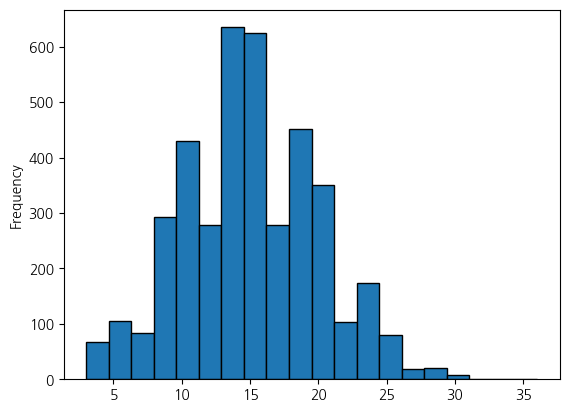

In [496]:
df["Prep_Time_min"].plot(kind="hist", bins=20, edgecolor="black")

<Axes: ylabel='Frequency'>

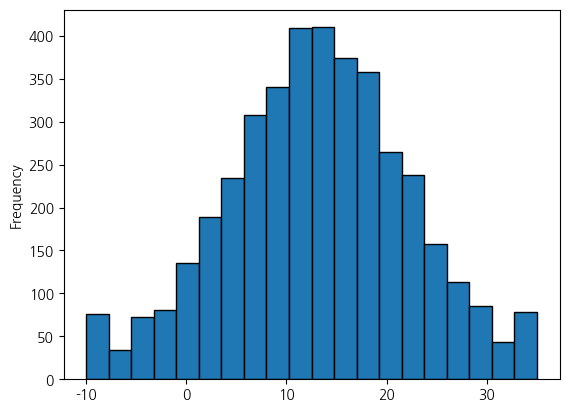

In [497]:
df["Temp_C"].plot(kind="hist", bins=20, edgecolor="black")

<Axes: ylabel='Frequency'>

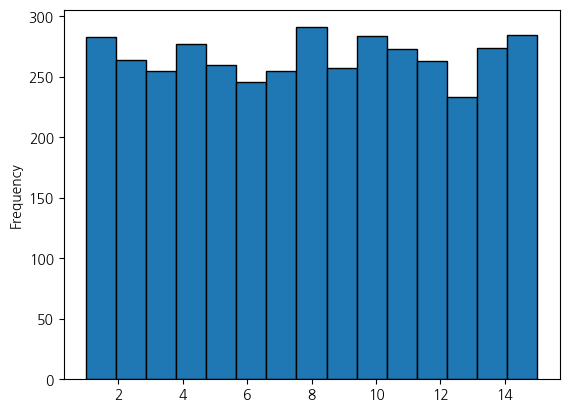

In [498]:
df["Riders_Available"].plot(kind="hist", bins=15, edgecolor="black")

<Axes: ylabel='Frequency'>

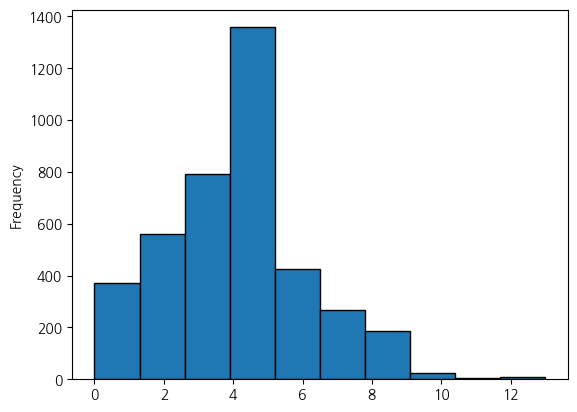

In [499]:
df["Order_Queue"].plot(kind="hist", bins=10, edgecolor="black")

<Axes: ylabel='Frequency'>

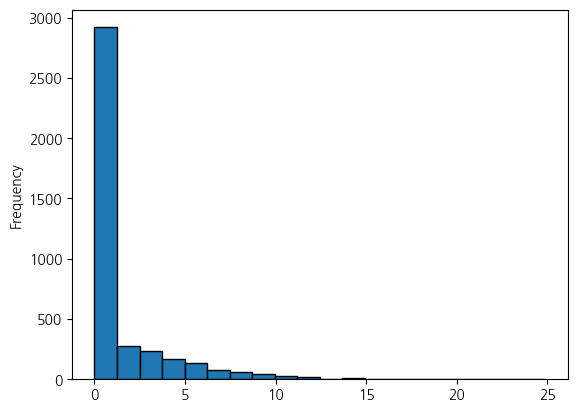

In [500]:
df["Rain_mm"].plot(kind="hist", bins=20, edgecolor="black")

<Axes: ylabel='Frequency'>

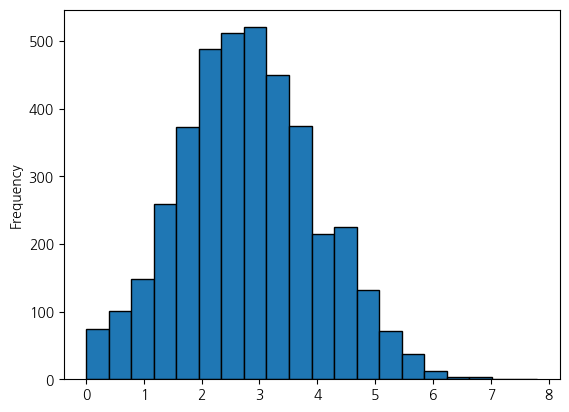

In [501]:
df["Wind_mps"].plot(kind="hist", bins=20, edgecolor="black")

<Axes: ylabel='Frequency'>

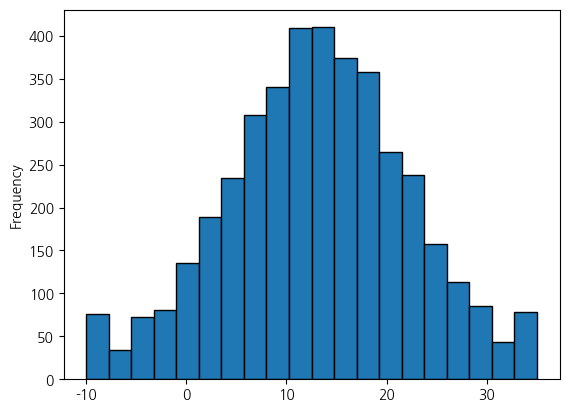

In [502]:
df["Temp_C"].plot(kind="hist", bins=20, edgecolor="black")

<Axes: ylabel='Frequency'>

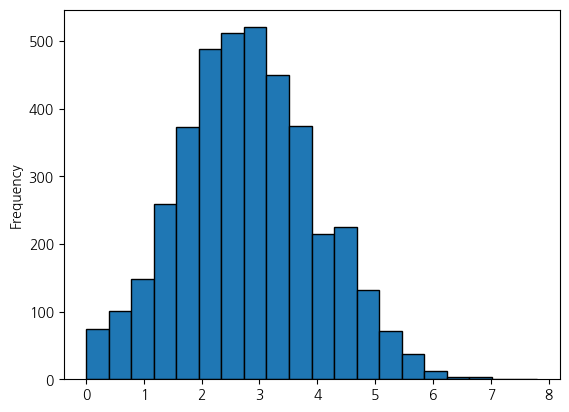

In [503]:
df["Wind_mps"].plot(kind="hist", bins=20, edgecolor="black")

In [504]:
df.head()

,Order_ID,Distance_km,Prep_Time_min,Riders_Available,Order_Queue,Weather,Rain_mm,Temp_C,Wind_mps,Rush_Hour,DayOfWeek,Time_Slot,Vehicle,Road_Type,Promo,Tip_Level,Delivery_Time_min
0,11502,6.1,15,9,3,Clear,0.0,14.9,1.2,1,1,Dinner,Scooter,Suburban,0,2,59.7
1,12587,7.5,14,15,6,Clear,0.0,14.3,3.0,0,0,Lunch,Scooter,Downtown,1,3,62.9
2,12654,17.6,24,14,4,Rain,4.8,27.0,3.2,0,0,Dinner,Bike,Downtown,0,2,134.7
3,11056,6.8,15,11,5,Clear,0.0,9.2,5.4,0,3,Night,Scooter,Highway,0,0,60.1
4,10706,19.6,16,11,2,Clear,0.0,11.8,2.6,1,2,Dinner,Bike,Downtown,0,1,149.2


In [505]:
df = orig_train_df.drop("Order_ID", axis=1)
df.head()

,Distance_km,Prep_Time_min,Riders_Available,Order_Queue,Weather,Rain_mm,Temp_C,Wind_mps,Rush_Hour,DayOfWeek,Time_Slot,Vehicle,Road_Type,Promo,Tip_Level,Delivery_Time_min
0,6.1,15,9,3,Clear,0.0,14.9,1.2,1,1,Dinner,Scooter,Suburban,0,2,59.7
1,7.5,14,15,6,Clear,0.0,14.3,3.0,0,0,Lunch,Scooter,Downtown,1,3,62.9
2,17.6,24,14,4,Rain,4.8,27.0,3.2,0,0,Dinner,Bike,Downtown,0,2,134.7
3,6.8,15,11,5,Clear,0.0,9.2,5.4,0,3,Night,Scooter,Highway,0,0,60.1
4,19.6,16,11,2,Clear,0.0,11.8,2.6,1,2,Dinner,Bike,Downtown,0,1,149.2


## 2) One-Hot Encoding ( `pd.get_dummies` )

In [506]:
df = pd.get_dummies(df, columns=cols_to_onehot, drop_first=False)
df.head()

,Distance_km,Prep_Time_min,Riders_Available,Order_Queue,Rain_mm,Temp_C,Wind_mps,Rush_Hour,DayOfWeek,Promo,...,Time_Slot_Dinner,Time_Slot_Lunch,Time_Slot_Morning,Time_Slot_Night,Vehicle_Bike,Vehicle_Car,Vehicle_Scooter,Road_Type_Downtown,Road_Type_Highway,Road_Type_Suburban
0,6.1,15,9,3,0.0,14.9,1.2,1,1,0,...,True,False,False,False,False,False,True,False,False,True
1,7.5,14,15,6,0.0,14.3,3.0,0,0,1,...,False,True,False,False,False,False,True,True,False,False
2,17.6,24,14,4,4.8,27.0,3.2,0,0,0,...,True,False,False,False,True,False,False,True,False,False
3,6.8,15,11,5,0.0,9.2,5.4,0,3,0,...,False,False,False,True,False,False,True,False,True,False
4,19.6,16,11,2,0.0,11.8,2.6,1,2,0,...,True,False,False,False,True,False,False,True,False,False


## 3) Train-Test Split

In [507]:
X = df.drop("Delivery_Time_min",axis=1)
y = df["Delivery_Time_min"]

In [248]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3333)

In [249]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3200, 26)
(3200,)
(800, 26)
(800,)


## 4) 표준화(`StandardScaler()`) 및 정규화(`MinMaxScaler()`)

In [250]:
std_scaler = StandardScaler()

X_train[cols_to_std] = std_scaler.fit_transform(X_train[cols_to_std])
X_test[cols_to_std] = std_scaler.transform(X_test[cols_to_std])
X_train.head()

,Distance_km,Prep_Time_min,Riders_Available,Order_Queue,Rain_mm,Temp_C,Wind_mps,Rush_Hour,DayOfWeek,Promo,...,Time_Slot_Dinner,Time_Slot_Lunch,Time_Slot_Morning,Time_Slot_Night,Vehicle_Bike,Vehicle_Car,Vehicle_Scooter,Road_Type_Downtown,Road_Type_Highway,Road_Type_Suburban
3742,-0.920584,0.183857,10,-0.999924,-0.489132,-0.224040,-2.346605,0,6,1,...,False,False,False,False,False,False,True,True,False,False
600,-0.507813,0.780149,10,-1.485987,-0.489132,0.503850,-0.176745,1,1,1,...,True,False,False,False,False,False,True,True,False,False
283,-0.022202,0.780149,8,-0.027797,0.469770,-0.256632,1.075098,0,3,0,...,True,False,False,False,False,False,True,False,True,False
48,0.123482,0.183857,1,0.458267,2.903905,0.373481,2.076572,1,2,0,...,True,False,False,False,True,False,False,True,False,False
2602,-1.309073,1.972733,3,2.402520,0.027200,1.025323,0.908186,0,6,1,...,False,False,False,False,False,True,False,True,False,False


In [251]:
reg_scaler = MinMaxScaler()

X_train[cols_to_reg] = reg_scaler.fit_transform(X_train[cols_to_reg])
X_test[cols_to_reg] = reg_scaler.transform(X_test[cols_to_reg])
X_train.head()

,Distance_km,Prep_Time_min,Riders_Available,Order_Queue,Rain_mm,Temp_C,Wind_mps,Rush_Hour,DayOfWeek,Promo,...,Time_Slot_Dinner,Time_Slot_Lunch,Time_Slot_Morning,Time_Slot_Night,Vehicle_Bike,Vehicle_Car,Vehicle_Scooter,Road_Type_Downtown,Road_Type_Highway,Road_Type_Suburban
3742,-0.920584,0.183857,0.642857,-0.999924,-0.489132,-0.224040,-2.346605,0,1.000000,1,...,False,False,False,False,False,False,True,True,False,False
600,-0.507813,0.780149,0.642857,-1.485987,-0.489132,0.503850,-0.176745,1,0.166667,1,...,True,False,False,False,False,False,True,True,False,False
283,-0.022202,0.780149,0.500000,-0.027797,0.469770,-0.256632,1.075098,0,0.500000,0,...,True,False,False,False,False,False,True,False,True,False
48,0.123482,0.183857,0.000000,0.458267,2.903905,0.373481,2.076572,1,0.333333,0,...,True,False,False,False,True,False,False,True,False,False
2602,-1.309073,1.972733,0.142857,2.402520,0.027200,1.025323,0.908186,0,1.000000,1,...,False,False,False,False,False,True,False,True,False,False


## 5) 모델 학습 및 예측

In [252]:
Lin_model = LinearRegression()
Lin_model.fit(X_train, y_train)

y_pred = Lin_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"모델 설명력(R2 Score): {r2:.4f} (1.0에 가까울수록 완벽)")
print(f"평균 오차(MAE): {mae:.2f}분 (예측이 평균적으로 약 {mae:.2f}분 빗나감)")

모델 설명력(R2 Score): 0.9469 (1.0에 가까울수록 완벽)
평균 오차(MAE): 3.90분 (예측이 평균적으로 약 3.90분 빗나감)


In [510]:
test_df = orig_test_df.drop("Order_ID", axis=1)


In [511]:
test_df = pd.get_dummies(test_df, columns=cols_to_onehot, drop_first=False)
test_df.shape

(1000, 27)

In [512]:
test_df[cols_to_std] = std_scaler.transform(test_df[cols_to_std])
test_df[cols_to_reg] = reg_scaler.transform(test_df[cols_to_reg])

In [513]:
X_test = test_df.drop("Delivery_Time_min", axis=1)
y_test = test_df["Delivery_Time_min"]

X_test.shape

(1000, 26)

In [386]:
y_pred = Lin_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"모델 설명력(R2 Score): {r2:.4f} (1.0에 가까울수록 완벽)")
print(f"평균 오차(MAE): {mae:.2f}분 (예측이 평균적으로 약 {mae:.2f}분 빗나감)")

모델 설명력(R2 Score): 0.9504 (1.0에 가까울수록 완벽)
평균 오차(MAE): 3.81분 (예측이 평균적으로 약 3.81분 빗나감)


## 6) 평가 (회귀)

In [387]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE :", mae)
print("MSE :", mse)
print("RMSE :", rmse)
print("r2 :", r2)

MAE : 3.8066194923151153
MSE : 23.313017942492436
RMSE : 4.828355614750475
r2 : 0.9503674923725983


## 7. 계수 알아보기

In [388]:
Lin_model.coef_

coef_df = pd.DataFrame({
    "feature": X.columns,
    "Coef": Lin_model.coef_
})

print("y-intercept:", Lin_model.intercept_)

print("\n------ 회귀 계수 ------")
coef_df

y-intercept: 72.0754927215071

------ 회귀 계수 ------


,feature,Coef
0,Distance_km,19.568436
1,Prep_Time_min,4.755507
2,Riders_Available,-5.818327
3,Order_Queue,2.344213
4,Rain_mm,0.601755
5,Temp_C,0.009639
6,Wind_mps,0.751398
7,Rush_Hour,6.317678
8,DayOfWeek,-0.331289
9,Promo,1.709861


# 회귀 : 수업용2 두번째 방법 - Split 안쓰고

In [508]:
# Train_test_split 첫번째 칸까지 돌리고 여기 돌리기.

std_scaler = StandardScaler()
reg_scaler = MinMaxScaler()

X[cols_to_std] = std_scaler.fit_transform(X[cols_to_std])
X[cols_to_reg] = reg_scaler.fit_transform(X[cols_to_reg])

print(X.shape)
print(y.shape)
X.head()

(4000, 26)
(4000,)


,Distance_km,Prep_Time_min,Riders_Available,Order_Queue,Rain_mm,Temp_C,Wind_mps,Rush_Hour,DayOfWeek,Promo,...,Time_Slot_Dinner,Time_Slot_Lunch,Time_Slot_Morning,Time_Slot_Night,Vehicle_Bike,Vehicle_Car,Vehicle_Scooter,Road_Type_Downtown,Road_Type_Highway,Road_Type_Suburban
0,0.030732,0.000498,0.571429,-0.512798,-0.489134,0.201073,-1.340577,1,0.166667,0,...,True,False,False,False,False,False,True,False,False,True
1,0.374243,-0.198815,1.000000,0.954436,-0.489134,0.135799,0.158717,0,0.000000,1,...,False,True,False,False,False,False,True,True,False,False
2,2.852432,1.794320,0.928571,-0.023720,1.284899,1.517428,0.325305,0,0.000000,0,...,True,False,False,False,True,False,False,True,False,False
3,0.202488,0.000498,0.714286,0.465358,-0.489134,-0.419028,2.157776,0,0.500000,0,...,False,False,False,True,False,False,True,False,True,False
4,3.343163,0.199812,0.714286,-1.001876,-0.489134,-0.136175,-0.174460,1,0.333333,0,...,True,False,False,False,True,False,False,True,False,False


In [381]:
Lin_model = LinearRegression()
Lin_model.fit(X, y)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [389]:
## 다시 X_test 만드는 곳으로 올라가서 돌리고 결과 확인

# 회귀 : 실무용

## Ridge, Lasso 적용

In [418]:
r_model = Ridge(random_state=3333)
l_model = Lasso(random_state=3333)


# 1. 테스트할 alpha 값들을 리스트로 만듭니다. (보통 로그 스케일 사용)
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# 2. 그리드서치 설정 (5-겹 교차 검증 사용)
r_grid_search = GridSearchCV(r_model, param_grid, cv=5)

# 3. 학습 (이 과정에서 6개의 alpha를 각각 테스트하며 최적의 값을 찾습니다)
r_grid_search.fit(X, y)

# 4. 결과 확인
print(f"L2 최적의 alpha: {r_grid_search.best_params_}")
print(f"L2 최고 점수: {r_grid_search.best_score_:.3f}")

# 5. 예측 실행 (테스트 데이터로 시험)
y_pred = r_grid_search.best_estimator_.predict(X_test)

# 6. 성능 평가
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"L2 모델 설명력(R2 Score): {r2:.4f} (1.0에 가까울수록 완벽)")
print(f"L2 평균 오차(MAE): {mae:.2f}분 (예측이 평균적으로 약 {mae:.2f}분 빗나감)")



# 2. 그리드서치 설정 (5-겹 교차 검증 사용)
l_grid_search = GridSearchCV(l_model, param_grid, cv=5)

# 3. 학습 (이 과정에서 6개의 alpha를 각각 테스트하며 최적의 값을 찾습니다)
l_grid_search.fit(X, y)

# 4. 결과 확인
print(f"L1 최적의 alpha: {l_grid_search.best_params_}")
print(f"L1 최고 점수: {l_grid_search.best_score_:.3f}")

# 5. 예측 실행 (테스트 데이터로 시험)
y_pred = l_grid_search.best_estimator_.predict(X_test)

# 6. 성능 평가
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"L1 모델 설명력(R2 Score): {r2:.4f} (1.0에 가까울수록 완벽)")
print(f"L1 평균 오차(MAE): {mae:.2f}분 (예측이 평균적으로 약 {mae:.2f}분 빗나감)")

L2 최적의 alpha: {'alpha': 1}
L2 최고 점수: 0.951
L2 모델 설명력(R2 Score): 0.9504 (1.0에 가까울수록 완벽)
L2 평균 오차(MAE): 3.81분 (예측이 평균적으로 약 3.81분 빗나감)
L1 최적의 alpha: {'alpha': 0.01}
L1 최고 점수: 0.951
L1 모델 설명력(R2 Score): 0.9505 (1.0에 가까울수록 완벽)
L1 평균 오차(MAE): 3.80분 (예측이 평균적으로 약 3.80분 빗나감)


In [517]:
# 2. 다항 특성 생성 (2차)
poly = PolynomialFeatures(degree=2, include_bias=False)

X_train_poly = poly.fit_transform(X)
X_test_poly = poly.transform(X_test)

# 3. 모델 생성 및 학습
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

l_model = Lasso(random_state=3333)
l_grid_search = GridSearchCV(l_model, param_grid, cv=5)
l_grid_search.fit(X_train_poly, y)


# 4. 예측 실행
y_pred = l_grid_search.best_estimator_.predict(X_test_poly)

# 5. 성능 평가
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE :", mae)
print("MSE :", mse)
print("RMSE :", rmse)
print("r2 :", r2)


c:\potenup3\02-machine-learning\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:716: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.395e+04, tolerance: 1.579e+02
  model = cd_fast.enet_coordinate_descent(
c:\potenup3\02-machine-learning\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:716: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.963e+03, tolerance: 1.553e+02
  model = cd_fast.enet_coordinate_descent(
c:\potenup3\02-machine-learning\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:716: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

MAE : 3.272327212223584
MSE : 16.912662259983364
RMSE : 4.1125007306970005
r2 : 0.9639936004558083


## LightGBM 적용

In [456]:
df = orig_train_df.copy()
df.head()

,Order_ID,Distance_km,Prep_Time_min,Riders_Available,Order_Queue,Weather,Rain_mm,Temp_C,Wind_mps,Rush_Hour,DayOfWeek,Time_Slot,Vehicle,Road_Type,Promo,Tip_Level,Delivery_Time_min
0,11502,6.1,15,9,3,Clear,0.0,14.9,1.2,1,1,Dinner,Scooter,Suburban,0,2,59.7
1,12587,7.5,14,15,6,Clear,0.0,14.3,3.0,0,0,Lunch,Scooter,Downtown,1,3,62.9
2,12654,17.6,24,14,4,Rain,4.8,27.0,3.2,0,0,Dinner,Bike,Downtown,0,2,134.7
3,11056,6.8,15,11,5,Clear,0.0,9.2,5.4,0,3,Night,Scooter,Highway,0,0,60.1
4,10706,19.6,16,11,2,Clear,0.0,11.8,2.6,1,2,Dinner,Bike,Downtown,0,1,149.2


In [457]:
df = orig_train_df.drop("Order_ID", axis=1)
test_df = orig_test_df.drop("Order_ID", axis=1)

In [466]:
cat_cols = ["Weather", "Time_Slot", "Vehicle", "Road_Type"] # 내가 쓴거

cat_cols = X.select_dtypes(include=["object", "category"]).columns.tolist() # GPT가 쓴거

In [467]:
for col in cat_cols:
    df[col] = df[col].astype("category")
    test_df[col] = test_df[col].astype("category")

In [468]:
X = df.drop("Delivery_Time_min", axis=1)
y = df["Delivery_Time_min"]

In [469]:
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=3333
)

In [484]:
model = LGBMRegressor(
    n_estimators=5000,
    learning_rate=0.01,
    num_leaves=63,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.0,
    reg_lambda=0.0,
    random_state=3333,
    n_jobs=-1,
)

model.fit(
    X_train, y_train,
    eval_set=[(X_valid, y_valid)],
    eval_metric="l2",  # RMSE계열(내부)
    categorical_feature=cat_cols if len(cat_cols) > 0 else "auto",
    callbacks=[
        # early stopping (검증 성능 안 좋아지면 멈춤)
        # lightgbm>=4.x 에서 권장 방식
        __import__("lightgbm").early_stopping(stopping_rounds=200, verbose=True),
        __import__("lightgbm").log_evaluation(period=100),
    ],
)

# 5. 성능 평가
y_pred = model.predict(X_valid, num_iteration=model.best_iteration_)

mae = mean_absolute_error(y_valid, y_pred)
mse = mean_squared_error(y_valid, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_valid, y_pred)



print(f"MAE : {mae:.4f}")
print(f"MSE : {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"r2  : {r2:.4f}")
print("best_iteration:", model.best_iteration_)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001859 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 698
[LightGBM] [Info] Number of data points in the train set: 3200, number of used features: 15
[LightGBM] [Info] Start training from score 66.928500
Training until validation scores don't improve for 200 rounds
[100]	valid_0's l2: 124.669
[200]	valid_0's l2: 51.8667
[300]	valid_0's l2: 32.1772
[400]	valid_0's l2: 25.9988
[500]	valid_0's l2: 23.6941
[600]	valid_0's l2: 22.6738
[700]	valid_0's l2: 22.2456
[800]	valid_0's l2: 22.0209
[900]	valid_0's l2: 21.952
[1000]	valid_0's l2: 21.9188
[1100]	valid_0's l2: 21.9126
[1200]	valid_0's l2: 21.9085
Early stopping, best iteration is:
[1033]	valid_0's l2: 21.8954
MAE : 3.7239
MSE : 21.8954
RMSE: 4.6793
r2  : 0.9518
best_iteration: 1033


In [485]:
X_test = test_df.drop("Delivery_Time_min",axis=1)
y_test = test_df["Delivery_Time_min"]

print(X_test.shape)
print(y_test.shape)

(1000, 15)
(1000,)


In [486]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)



print(f"MAE : {mae:.4f}")
print(f"MSE : {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"r2  : {r2:.4f}")

MAE : 3.6574
MSE : 20.9514
RMSE: 4.5773
r2  : 0.9554
